# OMEGA-Py spectra

### Load the module

In [11]:
import omegapy.omega_data as od
import omegapy.omega_plots as op
import omegapy.useful_functions as uf

import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

### Set the paths for folders containing OMEGA files

In [2]:
#od.set_omega_bin_path("/home/astcherbinine/science/OMEGA/data/OMEGAdata/binaries/")
#od.set_omega_py_path("/home/astcherbinine/science/OMEGA/data/OMEGAdata/")
od.set_omega_bin_path("/data/user/psa_psa01_pps_marsexpress/MEX-M-OMEGA*/DATA/")

### Load data and apply corrections

In [3]:
# Load the data cube
omega = od.OMEGAdata('0940_2')
# Apply thermal and atmospheric corrections
omega_corr_therm = od.corr_therm(omega, npool=15)
omega_corr_therm_atm = od.corr_therm_atm(omega, npool=15)     # Adjust npool according to your system


Computing OMEGA observation ORB0940_2
core:        128     352     410  cbyte:       2
suffix:        1       7       0  sbyte:       4
        0 or less IR:   102503
 negative pixels VIS:       12
anomalous pixels VIS:        2
saturated pixels VIS:        2
          spikes VIS:    27637

[done]data extraction and correction... 


Thermal & Atmospheric corrections: 100%|████████████████████████████████████████████████████████████| 52480/52480 [00:10<00:00, 5120.84it/s]


### Compute the data mask

In [4]:
mask = od.omega_mask(
    omega, 
    hide_128=True, 
    emer_lim=10, 
    inci_lim=70, 
    tempc_lim=-194, 
    limsat_c=500
    )

### Display surface reflectance

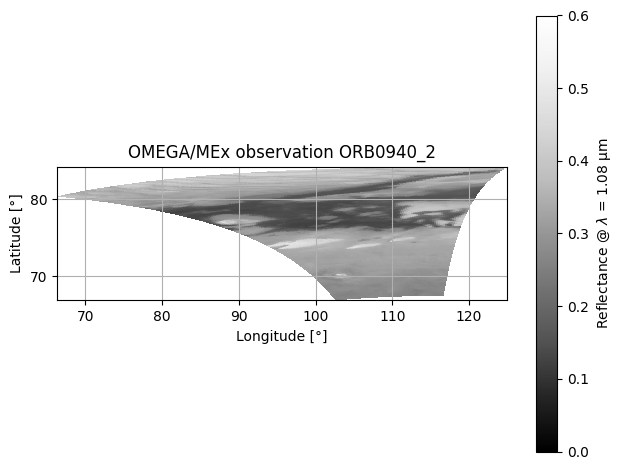

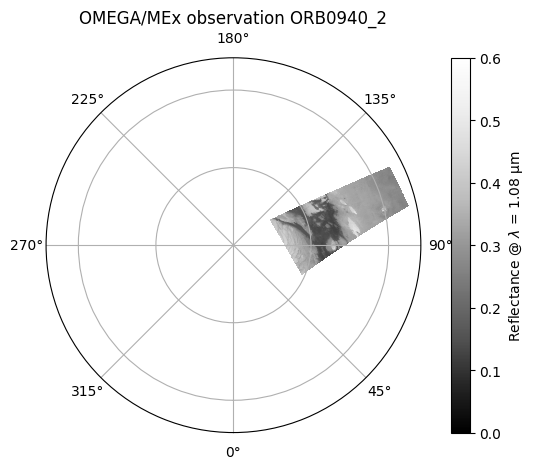

In [7]:
op.show_omega_v2(omega, lam=1.085, polar=False, vmin=0, vmax=0.6)
op.show_omega_v2(omega, lam=1.085, polar=True, vmin=0, vmax=0.6)

### Mask bad spectrels and wavelengths affected by strong atmospheric absorption

In [10]:
# Initialisation
lam = deepcopy(omega.lam)
mask_lam = np.ones(len(lam), dtype=bool)
# Identify indices of some bad spectels
i_bad_spectels = uf.where_closer_array([1.913, 2.73, 2.77], lam)
mask_lam[i_bad_spectels] = False
lam2 = lam[mask_lam]
# Identify indices of the beginning and ending of the 2.7 CO2 atmospheric band
i_atm = uf.where_closer_array([2.63, 2.81], lam2)
lam3 = deepcopy(lam2)
lam3[i_atm[0]:i_atm[1]] = np.nan

# Spectrum of a bright area (~ 72.37°N / 101.09°E)
#-- No corrections
sp0 = omega.cube_rf[288, 26, mask_lam]
sp0_avg = np.mean(omega.cube_rf[287:290, 25:28, mask_lam], axis=(0,1))
#-- Thermal correction only
sp1 = omega_corr_therm.cube_rf[288, 26, mask_lam]
sp1_avg = np.mean(omega_corr_therm.cube_rf[287:290, 25:28, mask_lam], axis=(0,1))
#-- Thermal and atmospheric corrections
sp2 = omega_corr_therm_atm.cube_rf[288, 26, mask_lam]
sp2_avg = np.mean(omega_corr_therm_atm.cube_rf[287:290, 25:28, mask_lam], axis=(0,1))

### Display spectra

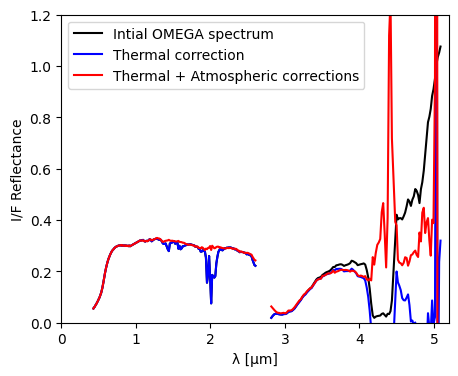

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), clear=True)

ax.plot(lam3, sp0_avg, 'k-', label='Intial OMEGA spectrum')
ax.plot(lam3, sp1_avg, 'b-', label='Thermal correction')
ax.plot(lam3, sp2_avg, 'r-', label='Thermal + Atmospheric corrections')

ax.set_xlim(0, 5.2)
ax.set_ylim(0, 1.2)
ax.set_xlabel('λ [μm]')
ax.set_ylabel('I/F Reflectance')
ax.legend(loc='upper left')